Sampling on sphere
==================

$\theta = 2\pi u$

$\phi = \arccos (2 v - 1)$

$u$,$v$ - random varietes on (0,1)

Pick $s=\cos \phi$ to beuniformly distributed and obtain the points:

$x = \sqrt{1-s^2} \cos \theta$

$y = \sqrt{1-s^2} \sin \theta$

$z = s$

##New BSSRDF sampling

$$
\partial
$$

In [1]:
%matplotlib inline

from pylab import *

def sampleOnSphere():
    u, v = random(2)
    theta = 2. * pi * u
    s = 2. * v - 1
    s2 = sqrt(1. - s*s)
    return array((s2 * cos(theta), s2 * sin(theta), s))

def getR(v, psi):
    Rm = sqrt(v / 12.46)
    return Rm, sqrt(-2.*v*log(1.-psi*(1-exp(-Rm*Rm*0.5/v))))

# For example
V = 0.1

def sampleHemi():
    u, v = random(2)
    theta = 2. * pi * u

    v2 = v*v
    x = v2 * cos(theta)
    y = v2 * sin(theta)
    z = v
    return array((x,y,z))

def sampleHemi2():
    u, v = random(2)
    theta = 2. * pi * u

    x = v * cos(theta)
    y = v * sin(theta)
    z = sqrt(-2. * V * log(1. - v * (1. - exp(-0.5/V))))
    return array((x,y,z))

def sampleHemi3():
    u, v = random(2)
    theta = 2. * pi * u

    x = v * cos(theta)
    y = v * sin(theta)
    z = v
    return array((x,y,z))

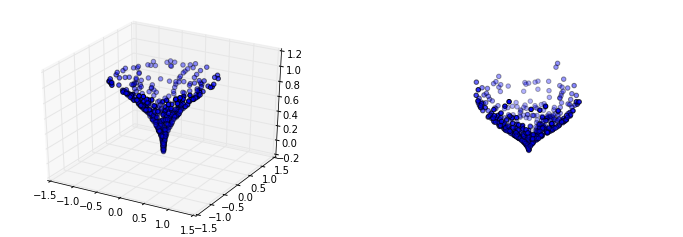

In [5]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

fig = figure()
fig.set_figwidth(12)
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')
ax2.set_axis_off()
#ax2.view_init(0, 0)

def scatterall(funcs, axeses):
    for func, ax in zip(funcs, axeses):
        points = array([func() for x in xrange(512)])
        tmp = ax.scatter(*points.transpose())

scatterall((sampleHemi, sampleHemi2), (ax1, ax2))